In [ ]:
## 대표적인 이산형 확률분포
- 베르누이분포 = > 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [4]:
# 필요 함수 정의

# 그래프 선의 종류
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 기댓값과 분산 계산 함수

# X가 이산형 확률변수인지 확인
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
# 그래프 작성 함수

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


## 베르누이 분포
- 확률변수가 취할 수 있는 값이 0과 1 밖에 없는 분포
    - 베르누이 분포를 따르는 확률변수의 시행이 베르누이 시행
    - 1은 성공, 0은 실패
    - 1이 나오는 확률 p, 0이 나오는 확률 1-ㅔ
    - 파라미터 p인 베르누이 분포 Bern(p)
    
![](../picture/베르누이함수.png)
    

- 동전을 던져서 앞면이 나올 확률
![](../picture/동전확률.png)

- 주사위를 한번 던져 6이 나오지 않을 확률
![](../picture/주사위확률.png)

In [5]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    
    return x_set, f

In [6]:
p=0.3 # 1이 나올 확률
X = Bern(p)

In [7]:
print(X)

(array([0, 1]), <function Bern.<locals>.f at 0x0000021B0A011E50>)


![](../picture/베르누이기대값분산.png)

In [8]:
# 기대값과 분산
check_prob(X)

expected value 0.3
variance 0.21


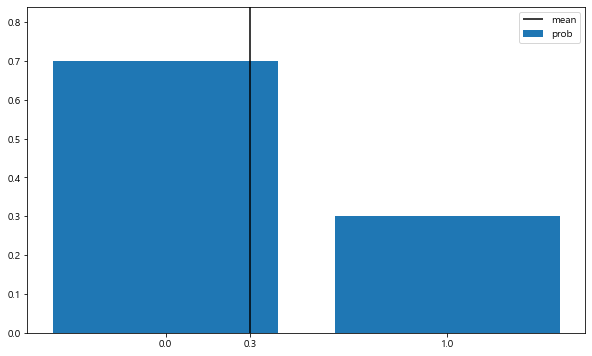

In [9]:
# 기대값
plot_prob(X)

## scipy.stats 모듈
- SciPy는 각종 수치 해석 기능을 제공하는 파이썬 패키지

    - SciPy는 여러개의 서브 패키지로 구성되어 있는데 그 중 scipy.stats 서브패키지는 여러가지 확률 분포 분석을 위한 기능을 제공

![](../picture/stats.png)

In [10]:
p=0.3

# 인수로 확률 파라미터를 취하고 베르누이 분포를 따르는 object를 반환함
# 반환 object가 저장된 변수 rv는 확률변수에 해당함

rv=stats.bernoulli(p)

In [11]:
# pmf 메서드 : 확률 질량 함수
rv.pmf(0) # 0이 나올 확률
rv.pmf(1) 

# pmf는 리스트를 인수로 넘길 수 있음
rv.pmf([0,1])

rv.pmf([0,1,2,3])

0.7000000000000001

0.3

array([0.7, 0.3])

array([0.7, 0.3, 0. , 0. ])

In [12]:
# cdf 누적 분포 함수
rv.cdf([0,1])

array([0.7, 1. ])

In [13]:
# 기대값과 분산 계산
rv.mean()
rv.var()

0.3

0.21

![](../picture/베르누이정리.png)

## 이항분포
- 성공 확률이 μ인 베르누이 시행을 N번 반복하는 경우
    - 가장 운이 좋을 때는 N번 모두 성공할 것이고, 운이 나쁜 경우에는 한번도 성공하지 못할 것
    - N번 중 성공한 횟수를 확률변수 X라고 한다면 X의 값을 0부터 N가지의 정수 중 하나가 됨

![](../picture/이항분포.png)

- 이런 확률변수를 **이항분포(binomial distribution)**를 따르는 확률변수라고 하며 다음과 같이 표시한다.


- X = 성공의 확률이 p인 ㅔ르누이 시행을 n번 반복할 때 성공의 수가 따르는 분포
    - 𝑋가 가질 수 있는 값: 0, 1, 2, …, 𝑛
    - n번 던져서 x번 성공할 확률

![](../picture/이항연산.png)

## comb 
![](../picture/comb_r.png)

In [14]:
from scipy.special import comb

com = comb(5,2)
com
(5*4*3*2*1)/(2*1*(3*2*1))

10.0

10.000

In [15]:
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [16]:
n=10
p=0.3

X=Bin(n,p)

X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [17]:
check_prob(X)

expected value 3.0
variance 2.1


In [18]:
x_set, f = X

x_set
f
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<function __main__.Bin.<locals>.f(x)>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [19]:
np.array([f(x_k) for x_k in x_set])

array([2.825e-02, 1.211e-01, 2.335e-01, 2.668e-01, 2.001e-01, 1.029e-01,
       3.676e-02, 9.002e-03, 1.447e-03, 1.378e-04, 5.905e-06])

In [20]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


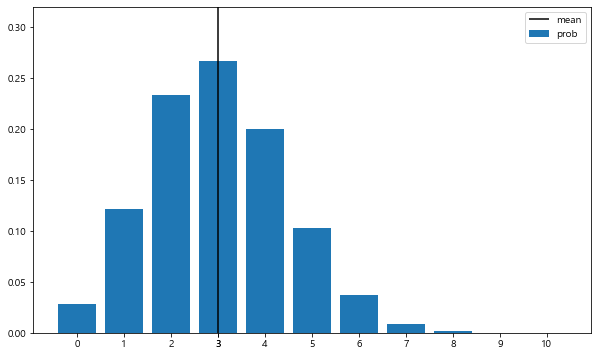

In [21]:
plot_prob(X)

## 성공할 확률(p)를 변경해 그래프를 그린 후 비교

In [22]:
# 라인스타일 자동으로 줌
list(zip([0.3,0.5], linestyles))
list(zip([0.3,0.5,0.7], linestyles))

n

[(0.300, '-'), (0.500, '--')]

[(0.300, '-'), (0.500, '--'), (0.700, ':')]

10

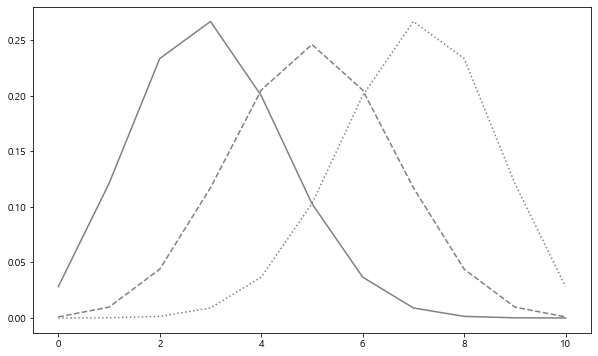

In [24]:
n=10 
#linestyles = ['-','--',':']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)

# 성공확률 0.3, 0.5, 0.7 일 때 그래프 비교

for p, ls in zip([0.3,0.5,0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}',ls=ls,color='gray')
    

## 파이썬 scipy 모듈의 stats.binom 함수 사용하여 이항확률변수 생성

- stats.binom(시행횟수, 성공확률)


In [25]:
# 성공확률이 0.6인 베르누이 시행을 10번 반복했을 때의 확률변수 rv 생성
N=10
mu=0.6
rv=stats.binom(N,mu)

In [26]:
xx=np.arange(N+1)
print(xx)
rv.pmf(xx)

[ 0  1  2  3  4  5  6  7  8  9 10]


array([1.049e-04, 1.573e-03, 1.062e-02, 4.247e-02, 1.115e-01, 2.007e-01,
       2.508e-01, 2.150e-01, 1.209e-01, 4.031e-02, 6.047e-03])

<BarContainer object of 11 artists>

Text(0.5, 0, '$P(X)$')

Text(0.5, 1.0, '막대그래프')

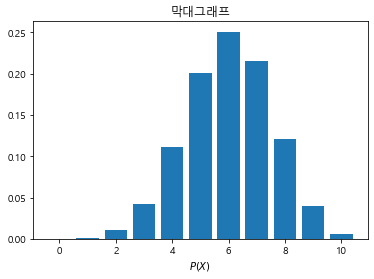

In [27]:
xx = np.arange(N+1)
plt.bar(xx,rv.pmf(xx),align='center')
plt.xlabel('$P(X)$')
plt.title('막대그래프')

## rsv함수
- binom.rvs 함수는 이항분포를 따르는 난수를 생성시킴
- 인자 : n,p,size,random_state

In [28]:
from scipy.stats import binom

In [29]:
binom.rvs(n=50,p=0.5,size=3)
binom.rvs(n=50,p=0.5,size=3)

array([28, 23, 27])

array([24, 26, 22])

In [30]:
binom.rvs(n=50,p=0.5,size=3,random_state=3)
binom.rvs(n=50,p=0.5,size=3,random_state=3)

array([25, 27, 23])

array([25, 27, 23])

In [31]:
# rvs 메서드로 무작위 표본을 뽑아내는 시뮬레이션을 한 결과 생성되는 난수는 이항 분포를 따르게 됨

np.random.seed(0)
x=rv.rvs(100)
len(x)
x

100

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

Text(0.5, 1.0, '이항분포의 시뮬레이션 결과')

Text(0.5, 0, '표본값')

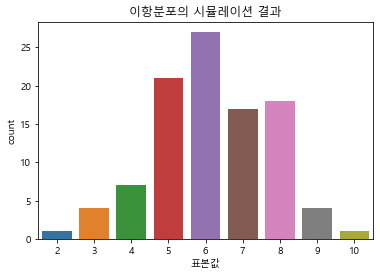

In [32]:
import seaborn as sns
sns.countplot(x)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()


## 포아송 분포
- 단위 시간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포
-  예.
    - 119 구조대에 걸려오는 시간 당 전화 횟수
    - 1년 동안 발생하는 진도 4 이상의 지진 횟수
    - 프러시아 기병 중에서 매년 말에 차여 사망하는 병사의 수
    - 한 야구경기에서 실책의 수
    - 서울지역의 5월 중 부도를 낸 중소기업 수


![](../picture/포아송.png)

- 하루에 평균 2건의 교통사고가 발생하는 (Poi(2))하는 지역에서 하루 사고가 한 건도 일어나지 않을 확률
![](../picture/교통사고.png)

In [34]:
# 편의상 x_set을 0~19 이하인 정수로 가정
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x)/factorial(x)*np.exp(-lam)
        else:
            return 0
    return x_set, f

In [35]:
X=Poi(10)
X # 0~ 19
x_set, f = X
prob = np.array([f(x_k) for x_k in x_set])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <function __main__.Poi.<locals>.f(x)>)

In [36]:
x_set
f
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

<function __main__.Poi.<locals>.f(x)>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <function __main__.Poi.<locals>.f(x)>)

In [37]:
x_set
prob

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

array([ 4.540e-05,  4.540e-04,  2.270e-03,  7.567e-03,  1.892e-02,
        3.783e-02,  6.306e-02,  9.008e-02,  1.126e-01,  1.251e-01,
        1.764e-02,  1.383e-03, -6.894e-05,  9.596e-06,  1.440e-07,
       -5.314e-08,  4.068e-09,  2.003e-10, -1.054e-11, -7.394e-13])